In [1]:
%run ../talktools.py

# Periodograms

Astro 128/256 (UC Berkeley, 2019)


## Some Motivation 

In Lab \#0, you worked with *metadata* &mdash; photometric Gaia observations, parallaxes  and proper motions derived from repeated observations of the source over time, etc..  In Lab \#1, you'll be working with *time series* flux data directly.  Photometric time series observations are often the central vector to our understanding of astrophysical sources.

Some examples of *aperiodic* science with time series data:
 
<ul>
    <li><b>supernovae for cosmology</b>: the different evolving shapes and colors of supernovae light curves reveal their physical classifications. This, in turn, can be used to target Type Ia supernovae for spectroscopic followup (to aid with precision cosmology measurements).
 <center>
 <figure>
  <img src="data/sne.jpg" width=30%>
  <figcaption>*Schematic supernovae light curves (Filippenko 97).*</figcaption>
</figure>
        </center>
   </li>
    <li><b>quasar selection</b>: the optical light of quasars vary somewhat like a *damped random walk.* Identifying point sources in optical catalogs that vary in such a way is a strong indicator of stochastic processes so generated in accretion disks. Finding QSOs for spectroscopic observations is important for baryon acoustic oscillations (BAO). </li>
</ul>

Some examples of *periodic* science with time series data:

<ul>
   <li><b>exoplanets</b>: the identification of exoplanet transits in front of their host stars is cottage industry, the gateway to discovery and studying exoplanets both individually and demographically. In low signal-to-noise regimes, we need to see many consistently-periodic transit cycles to gain confidence in the exoplanet detection.
    <center>
 <figure>
  <img src="data/kepler.png" width=80%>
  <figcaption>*Detecting an exoplanet system around two suns (Doyle et al., Science 2011).*</figcaption>
</figure>
    </center>
    </li>
   <li><b>variable stars</b>: different types of strongly variable stars are distinguished by the periodic changes of brightness.
    <figure>
  <img src="data/varstar.jpg" width=60%>
  <figcaption>*Periods of variable stars (Richards et al. 2011).*</figcaption>
</figure>
    </li>
    <li><b>black hole masses and spins</b>: analysis of X-ray flux time series in black hole candidates can be used to infer BH mass and spin.
        <figure>
  <img src="data/qpo.jpg" width=60%>
  <figcaption>*Quasi-Periodic observations of black hole binaries (Remillard and McClintock 2006).*</figcaption>
</figure>
     </ul>
   <li><b>Local distance scale from the Leavitt relation</b>: many variable star classes, not just RR Lyrae, exhibit a P-L relationship. These can be used to measure distances not just within our own Galaxy.
       <figure>
  <img src="data/pl.png" width=60%>
  <figcaption>*Density of Period-Magnitude of long-period variables in the LMC  (Boyer et al. 2015).*</figcaption>
</figure>
   </li>
</ul>
   

## Fourier Transform Review

Say we have a continuous signal $y(t)$, flux as a function of time. The Fourier Transform (FT) is defined as:

$$
\mathcal{F}\{y\} \equiv  \hat{y}(f)  \equiv \int_{-\infty}^\infty y(t) e^{-2\pi i f t} dt
$$

with $i = \sqrt{-1}$ in the exponent; this is just more compact way of writing:

$$
\hat{y}(f)  \equiv \int_{-\infty}^\infty y(t) [\cos(-2\pi ft) + i \sin(-2\pi ft)] dt 
$$

The inverse transform is:

$$
\mathcal{F}^{-1}\{\hat{y}\} =  \int_{-\infty}^\infty \hat{y}(f) e^{2\pi i f t} df
$$

Since the inverse FT of an FT of a function is that original function, it is clear that the process of taking an FT does not lose information. Indeed we say that $\mathcal{F}\{y\}$ lives in the frequency domain and $y(t)$ lives in the time-domain. 

The FT will, in general, have both real and imaginary components. For real-valued signals, if the signal is even [$y(t) = y(-t)$] then the FT will be real-valued. Likewise, if the signal is odd [$y(t) = -y(-t)$] then the FT will have only an imaginary component.

The **power (density) spectrum** is the complex square of the FT:

$$\mathcal{P}(f) \equiv |\mathcal{F}\{y\}|^2$$


### Some useful Things to know about the FT

<center>
  <figure>
  <img src="data/fig03_Fourier_pairs.png" width=60%>
  <figcaption>*Continuous signals ($x(t)$, left) and their Fourier Transforms (right). From VanderPlas (see https://arxiv.org/abs/1703.09824; https://github.com/jakevdp/PracticalLombScargle/)*</figcaption>
</figure>
</center>

- FT of a sine curve with frequency $f_0$ are two delta functions at $f=f_0$ and $f=f_1$.

- FT of a Gaussian is a Gaussian

- FT of a box function (zero everywhere except one in a certain range) is a sinc function [sinc$(x) = \sin(\pi x)/\pi x$]

- Rayleigh’s Theorem:

The sum of the power in the frequency and the spectral domain are the same.
$$
 \int_{-\infty}^\infty  |\hat{y}(f)|^2 df  =   \int_{-\infty}^\infty  |y(t)|^2 dt
$$ 


- Linearity:

The FT of two signals $x$, $y$ is the sum of the two FTs:

$$
\mathcal{F}\{x + y\} = \mathcal{F}\{x\} +  \mathcal{F}\{y\}
$$

- When we multiply in the time domain, we convolve (*) in the frequency domain

$$
[y * z](t)  \equiv \int_{-\infty}^\infty y(\tau) z(t - \tau) d\tau
$$

<center>
  <figure>
  <img src="data/fig06_Rectangular_Window.png" width=80%>
  <figcaption>*Continuous signals ($x(t)$, left) and their Fourier Transforms (right). The initial function (top left) is 
      $y(t) = 1.2 \sin(2\pi t)+0.8 \sin(4 \pi t)+0.4 \sin(6 \pi t)+0.1\sin(8 \pi t)$.
      From VanderPlas (see https://arxiv.org/abs/1703.09824; https://github.com/jakevdp/PracticalLombScargle/)*</figcaption>
</figure>
</center>


 


## (Fast) Discrete Transforms

IRL we do not observe continuous functions. Our observations of physical phenomena happen over a finite window in time, which introduces a smearing (sinc) function convolved with the frequency spectrum we are interested in (see figure above). Even more important, we only observe at a certain set of points in time; that is, we sample astronomical sources discretely.  In a contrived case, we may make $N$ observations speced by time $\Delta t$ between observations. Thus, the discrete FT turns the integral to a sum:

$$
\hat{y}(f) = \sum_{n=0}^N y(n \Delta t) e^{-2 \pi i f n \Delta t}
$$

where we now have approximated $y(t)$ by observing at times $t=0, \Delta t, 2 \Delta t ... N \Delta t$.

The Periodogram is an approximation to the spectral density:

$$
P(f) = \frac{1}{N} \left | \sum_{n=0}^N y(n \Delta t) e^{-2 \pi i f n \Delta t} \right|^2
$$


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("poster")
sns.set_style("whitegrid")
%matplotlib inline

Let's make a periodic source and see what the periodogram looks like:

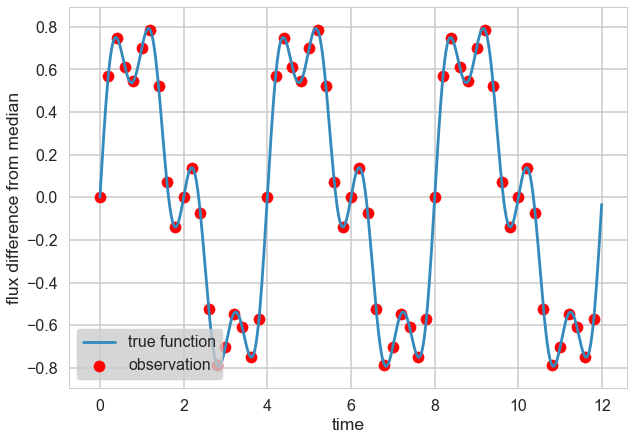

In [3]:
P_0 = 4  # period 

def y(t, P=P_0):
    """
    create a signal with period P, adding in some harmonics
    
    """
    omega = 2*np.pi/(P)
    return 0.7*np.sin(omega*t) + 0.2*np.sin(2*omega*t) + 0.25*np.sin(4*omega*t)


timestep = 0.01
timestep_course = 0.2  # dont observe all the time...

times = np.arange(0, 12,  timestep)
times_course = np.arange(0, 12, timestep_course)


f, ax = plt.subplots(figsize=(10, 7))

ax.plot(times, y(times),  label="true function")
ax.scatter(times_course, y(times_course), c="red", label="observation")
xlab=plt.xlabel("time")
ylab=plt.ylabel("flux difference from median")
leg=ax.legend(frameon=True)
leg.get_frame().set_facecolor('#cccccc')

In [4]:
from scipy.fftpack import fftshift, fftfreq

def classic_periodogram(t, mag, freq):
    t, mag, freq = map(np.asarray, (t, mag, freq))
    return abs(np.dot(mag, np.exp(-2j * np.pi * freq * t[:, None])) / np.sqrt(len(t))) ** 2

n = times_course.size
freq = fftshift(fftfreq(n, timestep_course))

p_schuster = classic_periodogram(times_course, y(times_course), freq)

(0, 2)

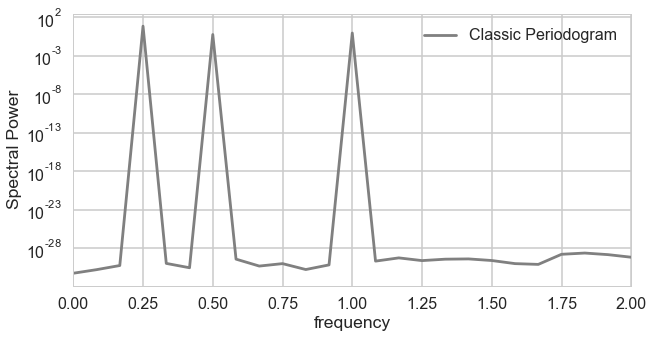

In [5]:
fig, ax = plt.subplots(1, figsize=(10, 5))
ax.plot(freq, p_schuster, '-', color='gray', label='Classic Periodogram')
ax.legend();
ax.set(ylabel='Spectral Power')
ax.set(xlabel='frequency')
ax.set_yscale('log')
plt.xlim(0, 2)

We can also use the Fast FT (FFT) methods in `scipy` (https://docs.scipy.org/doc/scipy/reference/tutorial/fftpack.html). The original formulation of the FFT is in Cooley, James W., and John W. Tukey, 1965, “An algorithm for the machine calculation of complex Fourier series,” Math. Comput. 19: 297-301.


Text(0.5,1,'Periodogram')

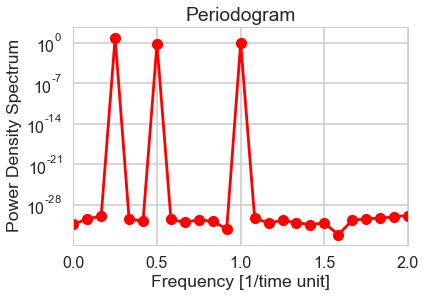

In [6]:
from scipy.fftpack import fft, fftfreq, fftshift

ft = fftshift(fft(y(times_course)))
n = times_course.size
freq = fftshift(fftfreq(n, timestep_course))

plt.semilogy(freq, (np.imag(ft)**2 + np.real(ft)**2)/n, "-o", c="red", label="DFT")

# overplot the frequencies where we injected power in y(t)
plt.vlines(1/P_0, 0, 10, alpha=0.3, color="green")
plt.vlines(2/P_0, 0, 10, alpha=0.3, color="green")
plt.vlines(4/P_0, 0, 10, alpha=0.3, color="green")

plt.xlim(0, 2)
#plt.ylim(1e-4, 8)
plt.xlabel("Frequency [1/time unit]")
plt.ylabel("Power Density Spectrum")
plt.title("Periodogram")

Let's take a look at what a non-periodic signal might look like.

Simulate a FT with $1/f^\alpha$ noise. When $\alpha=0$ then we have white noise. $\alpha=1$ is "pink" noise. See Timmer, J. and Koenig, M.: On generating power law noise. Astron. Astrophys. 300, 707-710 (1995)

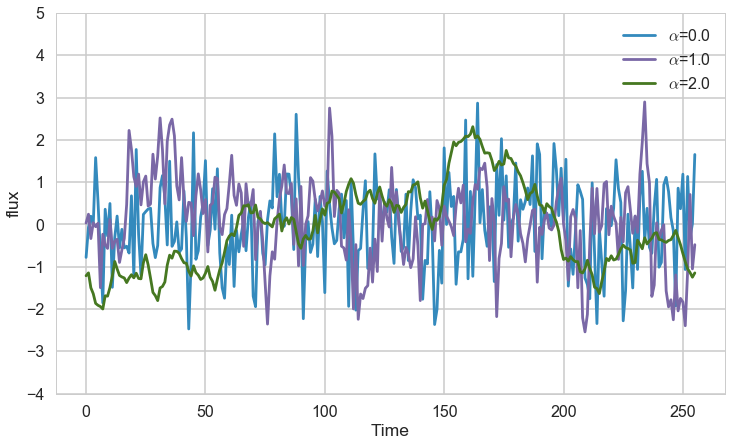

In [7]:
from scipy.fftpack import ifft, ifftshift

f = plt.figure(figsize=(12, 7))
rnd = np.random.RandomState(42)
nfreq = 256

freqs = fftfreq(nfreq)
s_scale = np.abs(np.concatenate([freqs[freqs<0], [freqs[-1]]]))

alphas = [ 0, 1, 2] 
spects = []
ys = []

for α in alphas:
    the_scale = s_scale**(-α/2)
    spectrum_r = the_scale*(rnd.normal(size=len(the_scale)))
    spectrum_i = the_scale*(rnd.normal(size=len(the_scale)))
    if not (nfreq % 2): spectrum_i[0] = spectrum_i[0].real
    spectrum = spectrum_r + 1J * spectrum_i
    spectrum = np.concatenate([spectrum[1-(nfreq % 2):][::-1], spectrum[:-1].conj()])
    spects.append(spectrum)
    
    #get the light curve with an inv FFT
    y = ifft(spectrum).real
    ys.append(y/np.std(y))
    plt.plot(ys[-1], label=r"$\alpha$=%.1f" % α)
    
plt.ylim(-4,5)
plt.xlabel("Time")
plt.ylabel("flux")
plt.legend()

Text(0.5,1,'Periodogram ')

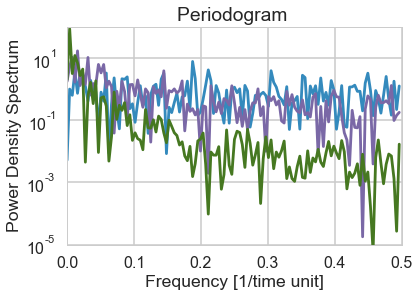

In [8]:
for lc in range(len(alphas)):
    ft = fftshift(fft(ys[lc]))
    n = ys[lc].size
    freq = fftshift(fftfreq(n, 1))
    plt.semilogy(freq, (np.imag(ft)**2 + np.real(ft)**2)/n, "-", label= r"$\alpha$=%.f" % lc)

plt.xlim(0, 0.5)
plt.ylim(1e-5, 100)
plt.xlabel("Frequency [1/time unit]")
plt.ylabel("Power Density Spectrum")
plt.title("Periodogram ")

## Lomb-Scargle Periodograms

Unsurprisingly, because we do not observe sources on the sky at regular intervals, we cannot use the discrete Fourier transform (nor the FFT). Moreover, when we do observe we observe in a finite signal-to-noise regime. That is, there are uncertainties on the quantities that we measure. To handle, this Lomb (1976) and Scargle (1983, 1989) worked on a formalism that can handle irregular sampling of noisy data.

The key insight is that we can try to model our observations $y(t)$ as the sum of component sine curves with:
$$
y_{\rm model}(t; f) = y_0(f)+ A_f \sin(2 \pi f (t−\phi_f))
$$

here, the DC offset $y_0(f)$, the normalization $A_f$, and $\phi_f$ are all fit to minimize the $\chi^2$:

$$
\chi^2(f) = \sum \left(\frac{y(t) - y_{\rm model}(t; f)}{\sigma(t)}\right)^2
$$
The uncertainties in the measurements are $\sigma(t)$.

In [9]:
from astropy.stats import LombScargle

In [10]:
LombScargle?

When we perform an L-S, the resultant power spectrum unitless. A L-S of random noise follows a $\chi^2$ distribution for 2 degrees of freedom.

Text(0,0.5,'flux')

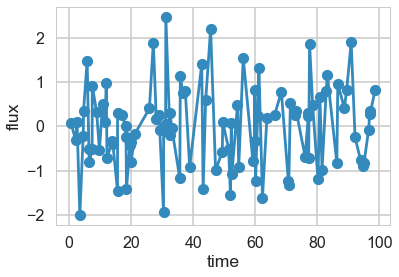

In [11]:
rng = np.random.RandomState(42)
n = 100
t = np.array(sorted(100 * rng.rand(n)))
y = rng.randn(n)
plt.plot(t, y, "o-")
plt.xlabel("time")
plt.ylabel("flux")

/Users/kareem/anaconda/lib/python3.5/site-packages/astropy/stats/lombscargle/implementations/fast_impl.py:122: RuntimeWarning: invalid value encountered in true_divide
  power = (YC * YC / CC + YS * YS / SS)


[Text(0.5,0,'frequency')]

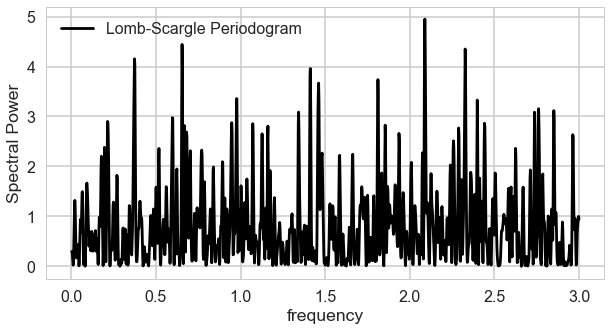

In [12]:
freq, p_ls = LombScargle(t, y, fit_mean=False, center_data=True).autopower(minimum_frequency=0,
                                         maximum_frequency=3,
                                         normalization='psd',
                                         samples_per_peak=5)
fig, ax = plt.subplots(1, figsize=(10, 5))
ax.plot(freq, p_ls, '-k', label='Lomb-Scargle Periodogram')
ax.legend();
ax.set(ylabel='Spectral Power')
ax.set(xlabel='frequency')

As seen above, with many effective trials, the L-S (and any periodogram) will pick up spurious signals. We could
resample the data to help determine what level of power would a false alarm with a given probability.

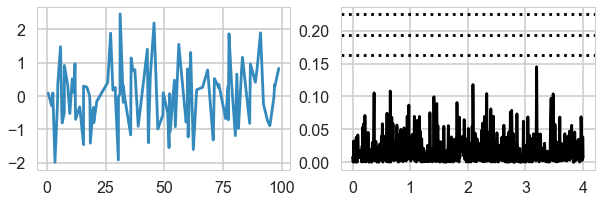

In [13]:
# following from Vanderplas https://github.com/jakevdp/PracticalLombScargle/blob/master/figures/Uncertainty.ipynb
def LombScargle_bootstrap(t, y, freq, n_bootstraps=100,
                          aggregate=max, random_seed=None,
                          normalization='standard'):
    rng = np.random.RandomState(random_seed)
    
    def bootstrapped_power():
        resample = rng.randint(0, len(y), len(y))  # sample with replacement
        ls_boot = LombScargle(t, y[resample])
        return aggregate(ls_boot.power(freq, normalization=normalization))
    
    return np.array([bootstrapped_power() for i in range(n_bootstraps)])

ls = LombScargle(t, y)
freq, power = ls.autopower(maximum_frequency=4, samples_per_peak=10)

p_boot = LombScargle_bootstrap(t, y, freq)

fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax[0].plot(t, y)

ax[1].plot(freq, power, '-k')
for cutoff in np.percentile(p_boot, [85, 95, 99]):
    ax[1].axhline(cutoff, color='black', linestyle='dotted')

We'd conclude from the above that there are no significant peaks. Now, let's look at the case where we actually have a signal.

Text(0,0.5,'flux')

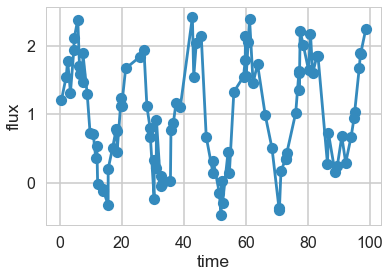

In [14]:
rng = np.random.RandomState(42)
n = 100
t = np.array(sorted(100 * rng.rand(n)))
y = 1 + np.sin(t/3) + 0.3 * rng.randn(n)
plt.plot(t, y, "o-")
plt.xlabel("time")
plt.ylabel("flux")

In [15]:
freq, p_ls = LombScargle(t, y, fit_mean=False, center_data=True).autopower(minimum_frequency=0,
                                         maximum_frequency=0.5,
                                         normalization='psd',
                                         samples_per_peak=20)
p_schuster = classic_periodogram(t, y, freq)

/Users/kareem/anaconda/lib/python3.5/site-packages/astropy/stats/lombscargle/implementations/fast_impl.py:122: RuntimeWarning: invalid value encountered in true_divide
  power = (YC * YC / CC + YS * YS / SS)


[Text(0.5,0,'frequency')]

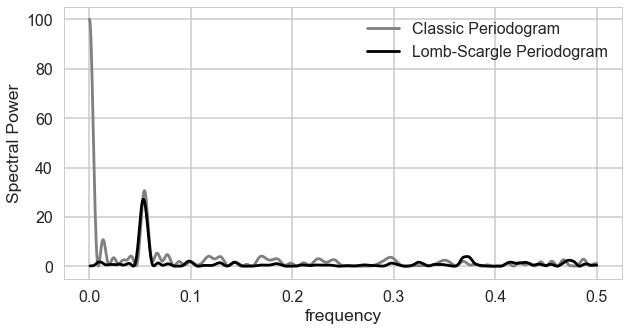

In [16]:
fig, ax = plt.subplots(1, figsize=(10, 5))
ax.plot(freq, p_schuster, '-', color='gray', label='Classic Periodogram')
ax.plot(freq, p_ls, '-k', label='Lomb-Scargle Periodogram')
ax.legend();
ax.set(ylabel='Spectral Power')
ax.set(xlabel='frequency')

You'll notice that the classic periodogram approach is descrepant at low frequencies ... why is that? Take a close look at the function `y`.

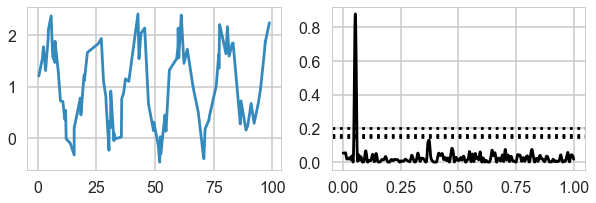

In [17]:
ls = LombScargle(t, y)
freq, power = ls.autopower(maximum_frequency=1, samples_per_peak=10)

p_boot = LombScargle_bootstrap(t, y, freq)

fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax[0].plot(t, y)

ax[1].plot(freq, power, '-k')
for cutoff in np.percentile(p_boot, [85, 95, 99]):
    ax[1].axhline(cutoff, color='black', linestyle='dotted')

From the above, it's pretty clear that we have found a significant peak (a peak of this height occurs much less than 1% by random chance).